# <center> NHL: Selection Bias and The Matthews Effect </center>
#### Adam Mortensen
#### Nov 5th, 2022

---

In [118]:
# Imports
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import odr
import math

In [123]:
## Make Plots displace a little nicer

from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [124]:
df_hockey = pd.read_csv('Master.csv')
df_hockey.describe()

,height,weight,ihdbID,firstNHL,lastNHL,firstWHA,lastWHA,birthYear,birthMon,birthDay,deathYear,deathMon,deathDay
count,7334.000000,7336.000000,7125.000000,6851.000000,6851.000000,903.000000,903.000000,7543.000000,7506.000000,7504.000000,1320.000000,1173.000000,1168.000000
mean,71.904418,189.503953,18159.395930,1979.898555,1985.173551,1974.256921,1975.746401,1955.170091,6.056088,15.605144,2547.587121,6.670929,15.244863
std,2.328650,18.341611,22852.778006,24.150092,24.359206,2.123774,1.947460,26.379075,3.434267,8.917103,2052.311223,3.484605,8.601029
min,63.000000,125.000000,45.000000,1917.000000,1917.000000,1972.000000,1972.000000,1841.000000,1.000000,1.000000,1907.000000,1.000000,1.000000
25%,70.000000,178.000000,3339.000000,1968.000000,1974.000000,1972.000000,1974.000000,1943.000000,3.000000,8.000000,1970.000000,4.000000,8.000000
50%,72.000000,190.000000,7500.000000,1985.000000,1991.000000,1974.000000,1976.000000,1961.000000,6.000000,15.000000,1989.000000,7.000000,15.000000
75%,73.000000,200.000000,23463.000000,1999.000000,2006.000000,1976.000000,1978.000000,1975.000000,9.000000,23.000000,2002.000000,10.000000,23.000000
max,81.000000,265.000000,118280.000000,2011.000000,2011.000000,1978.000000,1978.000000,1993.000000,12.000000,31.000000,9999.000000,12.000000,31.000000


In [128]:
month_converter = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7:'July', 8:'August', 9:'September', 10:'October', 11:'November',
    12:'December'
}

In [135]:
def count_data(birth_mon, month_to_count_dict):
    if (math.isnan(birth_mon)):
      return
    month_text = month_converter[birth_mon]
    if (month_text in month_to_count_dict):
      month_to_count_dict[month_text] += 1
    else:
        month_to_count_dict[month_text] = 1

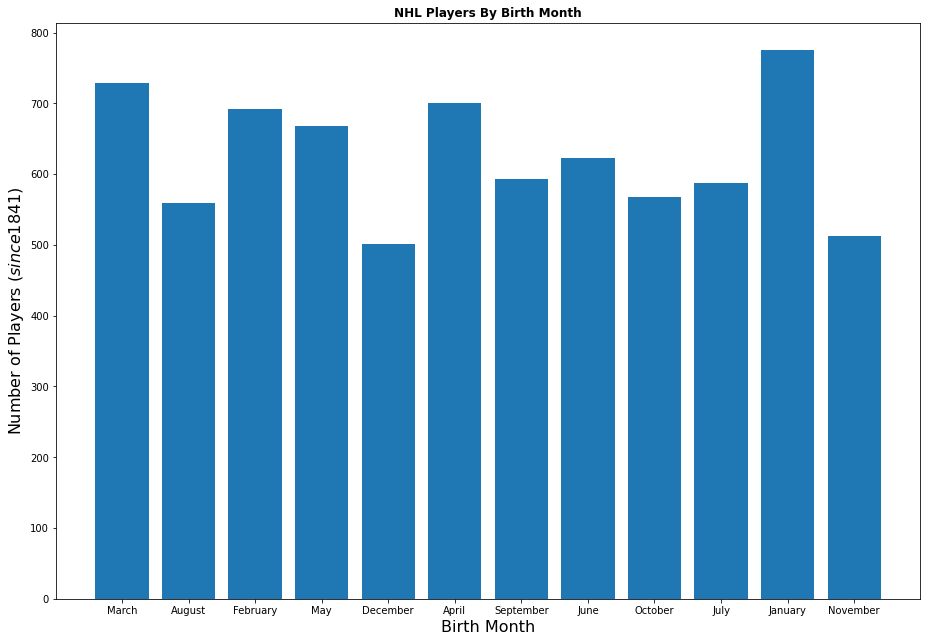

In [143]:
birth_months = df_hockey.loc[:, "birthMon"]
fig1 = plt.figure()
axis1 = fig1.add_axes([0, 0, 2, 2])

rows = df_hockey.iloc[:]
month_to_count = {}
for row in df_hockey.iterrows():
  birth_mon = row[1]["birthMon"];
  count_data(birth_mon, month_to_count)

axis1.bar(list(month_to_count.keys()), list(month_to_count.values()))

axis1.set_title('NHL Players By Birth Month', weight='bold')
axis1.set_xlabel('Birth Month',size=16)
axis1.set_ylabel('Number of Players $(since 1841)$',size=16)
print()

In [145]:
def count_data_with_num(birth_mon, month_to_count_dict):
    if (math.isnan(birth_mon)):
      return
    if (birth_mon in month_to_count_dict):
      month_to_count_dict[birth_mon] += 1
    else:
        month_to_count_dict[birth_mon] = 1

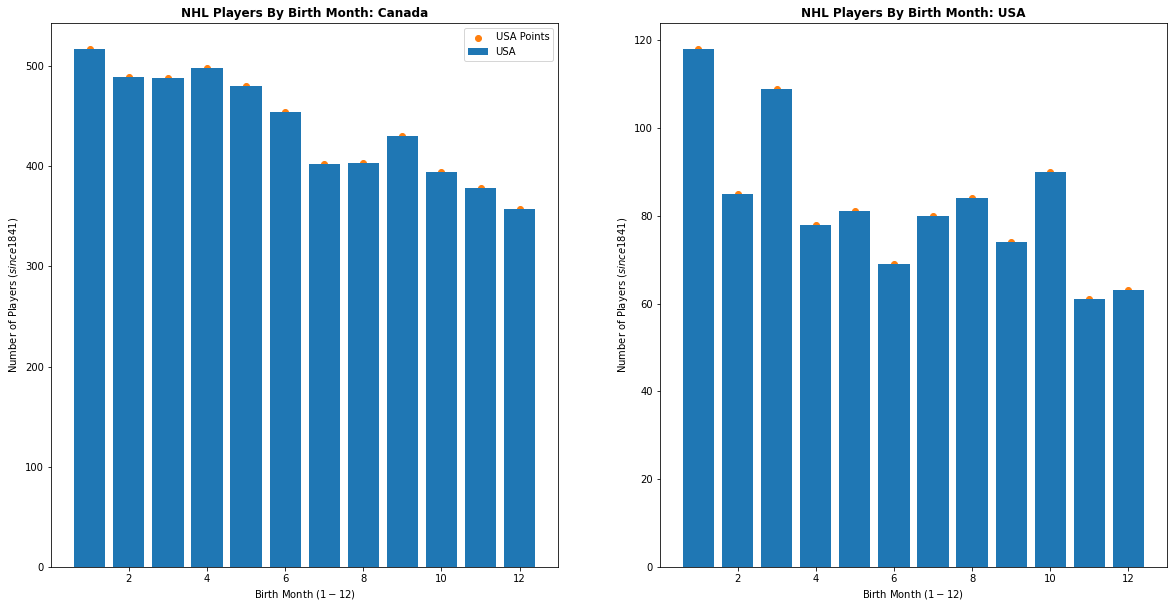

In [170]:
fig2, axis2 = plt.subplots(1, 2, figsize=(20,10))

rows = df_hockey.iloc[:]
month_to_count_cn = {}
month_to_count_us = {}
for row in df_hockey.iterrows():
  birth_mon = row[1]["birthMon"];
  if (row[1]["birthCountry"] == "Canada"):
    count_data_with_num(birth_mon, month_to_count_cn)

  elif (row[1]["birthCountry"] == "USA"):
    count_data_with_num(birth_mon, month_to_count_us)

#axis2[0].legend(['Output Voltage', 'Capacitor Voltage'], loc='lower right')
axis2[0].set_title('NHL Players By Birth Month: Canada', weight='bold')
axis2[0].set_xlabel('Birth Month $(1-12)$')
axis2[0].set_ylabel('Number of Players $(since 1841)$')

axis2[1].set_title('NHL Players By Birth Month: USA', weight='bold')
axis2[1].set_xlabel('Birth Month $(1-12)$')
axis2[1].set_ylabel('Number of Players $(since 1841)$')


# Plot Data:
axis2[0].bar(list(month_to_count_cn.keys()), list(month_to_count_cn.values()))
axis2[1].bar(list(month_to_count_us.keys()), list(month_to_count_us.values()))
axis2[0].scatter(list(month_to_count_cn.keys()), list(month_to_count_cn.values()))
axis2[1].scatter(list(month_to_count_us.keys()), list(month_to_count_us.values()))

## Data Labeling:
axis2[0].legend(['Canada Points','Canada'], loc='upper right')
axis2[0].legend(['USA Points','USA'], loc='upper right')

print()

In [171]:
def count_players_with_birth_month(birth_month, df):
  count = 0
  total = 0
  for row in df_hockey.iterrows():
    if (math.isnan(row[1]["birthMon"])):
      continue

    elif (row[1]["birthMon"] == birth_month):
      count+=1
    total+=1
  
  return (count, total)

In [172]:
# Statistic breakdown: NHL Players by Birth Month Since 1841

# January:
res_1 = count_players_with_birth_month(1, df_hockey)
print(res_1)
print(res_1[0] / res_1[1] * 100)

# December
res_2 = count_players_with_birth_month(12, df_hockey)
print(res_2)
print(res_2[0] / res_2[1] * 100)

(775, 7506)
10.325073274713564
(501, 7506)
6.6746602717825745


# MLB Example




<BarContainer object of 12 artists>

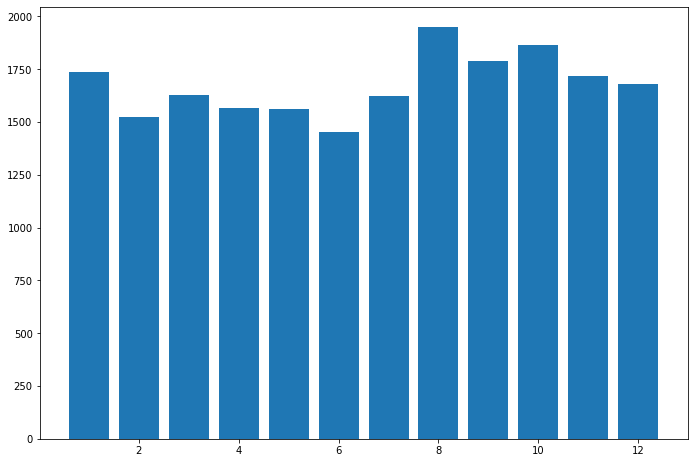

In [30]:
birth_months = df_players.loc[:, "birthMonth"]
fig1 = plt.figure()
axis1 = fig1.add_axes([0, 0, 1.5, 1.5])

## count number of each month:
month_to_count = {}
for row in birth_months:
  if (row in month_to_count):
    month_to_count[row] += 1
  else:
    if (not math.isnan(row)): #check that data isnt empty
      month_to_count[row] = 1

axis1.bar(list(month_to_count.keys()), list(month_to_count.values()))